In [1]:
from ultralytics import YOLO
import cv2
import sys
import cvzone
import math
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img_path = "/home/wsl/py_notebooks/yolo_streetSignsDetection/data/test/images/"
images = []

for filename in os.listdir(img_path):
  if filename.endswith(".jpg") or filename.endswith(".png"): # Add more conditions here if needed
      img_full_path = os.path.join(img_path, filename)
      if os.path.isfile(img_full_path):
          images.append(img_full_path)


In [3]:
model_path = "/home/wsl/py_notebooks/yolo_streetSignsDetection/best.pt"
model = YOLO(model_path)


In [4]:
classNames = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']



Speed Limit 70
0: 640x640 1 Speed Limit 70, 1606.3ms
Speed: 16.0ms preprocess, 1606.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

Speed Limit 60
0: 640x640 1 Speed Limit 60, 930.3ms
Speed: 6.2ms preprocess, 930.3ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

Speed Limit 100
0: 640x640 1 Speed Limit 100, 935.8ms
Speed: 11.3ms preprocess, 935.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 1149.2ms
Speed: 2.0ms preprocess, 1149.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

Stop
0: 640x640 1 Stop, 1119.4ms
Speed: 16.3ms preprocess, 1119.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

Speed Limit 20
0: 640x640 1 Speed Limit 20, 973.7ms
Speed: 2.2ms preprocess, 973.7ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

Speed Limit 30
Speed Limit 70
0: 640x640 1 Speed Limit 30, 1 Speed Limit 70, 929.2ms
Speed: 4.5ms preprocess, 929.2ms 

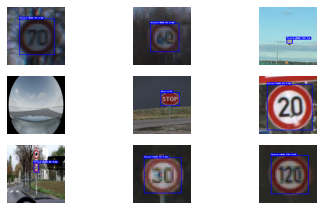

In [5]:
# Define the color for the bounding boxes
myColor = (0, 0, 255)

# Create a figure with 3x3 subplots
fig, axs = plt.subplots(3, 3, figsize=(6.4, 3.6))

for iterations in range(9):
 random_number = np.random.randint(0, len(images))
 img = cv2.imread(cv2.samples.findFile(images[random_number]))
 if img is None:
     sys.exit("Could not read the image.")

 # Convert the image from BGR color (which OpenCV uses) to RGB color (which matplotlib uses)
 img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

 # Apply the model to the image
 results = model(img, stream=True)

 for r in results:
     boxes = r.boxes
     for box in boxes:
         # Bounding Box
         x1, y1, x2, y2 = box.xyxy[0]
         x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
         w, h = x2 - x1, y2 - y1

         # Confidence
         conf = math.ceil((box.conf[0] * 100)) / 100
         # Class Name
         cls = int(box.cls[0])
         currentClass = classNames[cls]
         print(currentClass)
         if conf > 0.5:
             cvzone.putTextRect(img_rgb, f'{classNames[cls]} {conf}',
                          (max(0, x1), max(35, y1)), scale=1, thickness=2, colorB=myColor,
                          colorT=(255, 255, 255), colorR=myColor, offset=5)
             cv2.rectangle(img_rgb, (x1, y1), (x2, y2), myColor, 3)

 # Display the image in the corresponding subplot
 row = iterations // 3
 col = iterations % 3
 axs[row, col].imshow(img_rgb)
 axs[row, col].axis('off')

# Save the figure to a file
plt.savefig("/home/wsl/py_notebooks/yolo_streetSignsDetection/output.png", dpi=3200)

# Show the figure
plt.show()
